Testing the icestream

In [146]:
%load_ext autoreload
%autoreload 2
%aimport -fenics
%aimport -numpy 
%aimport -matplotlib
from fenics import *
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import crosssection


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
#run experiments
experiments = settings.experiments
for experiment in experiments:
    print(experiment['name'])
    crosssection.run_experiment(experiment)

control

Running 2d experiment:  control
{}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 13 iterations and 13 linear solver iterations.
saving to  ../output//2d_control.h5
wider_slip

Running 2d experiment:  wider_slip
{'icestream_width': 50100, 'name': 'wider_slip'}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 13 iterations and 13 linear solver iterations.
saving to  ../output//2d_wider_slip.h5
softer_margin

Running 2d experiment:  softer_margin
{'name': 'softer_margin', 'shearmargin_enhancement': 4.2}
Solving linear variational problem.
Solving nonlinear variational problem.saving to  ../output//2d_softer_margin.h5

  Newton solver finished in 13 iterations and 13 linear solver iterations.
thicker

Running 2d experiment:  thicker
{'domain_h': 2010, 'name': 'thicker'}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 

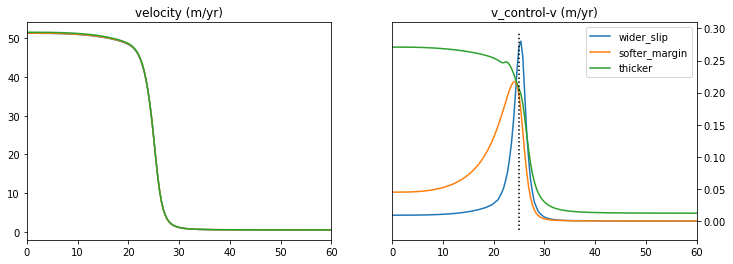

In [156]:

yr2sec = 365.25*24*60*60




w = experiments[0]['domain_w']
x = np.linspace(-w/2,w/2,400)
#x= np.linspace(8e3,12e3,100)

def loadex(experiment):
    fname = settings.filename2d(experiment)
    results = solution_io.load_solution(fname)
    #mesh = results['mesh']
    usol = results['u']
    vfun = usol.sub(2)
    #psol = results['p']
    experiment = results['experiment']
    domain_h = experiment["domain_h"]
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    return v

ref_experiment = experiments[0]
v0 = loadex(ref_experiment)
marginpos0 = x[np.argmax(np.abs(np.gradient(v0)*(x>0)))]


plt.rcParams['figure.figsize']=(12,4)
f,ax = plt.subplot_mosaic('AB')
for experiment in experiments:
    #if experiment["shearmargin_enhancement"]!=ref_experiment["shearmargin_enhancement"]:
    #    continue
    if experiment["name"]==ref_experiment["name"]:
        continue
    v = loadex(experiment)
    ax['A'].plot(x/1000,v*yr2sec,label=experiment['name'])
    ax['A'].set_xlim([0, 60])
    ax['B'].plot(x/1000,(v-v0)*yr2sec,label=experiment['name'])
    plt.xlim([0, 60])
ax['B'].plot(np.array([marginpos0,marginpos0])/1000,ax['B'].get_ylim(),'k:')
ax['B'].yaxis.tick_right()

ax['B'].legend()
ax['A'].set_title('velocity (m/yr)')
ax['B'].set_title(f'v_{ref_experiment["name"]}-v (m/yr)');

Object cannot be plotted directly, projecting to piecewise linears.


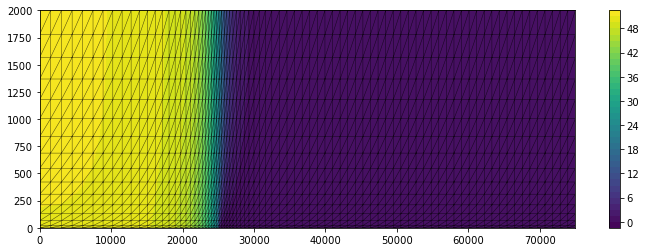

In [ ]:
fname = settings.filename2d(experiments[0])
results = solution_io.load_solution(fname)
#mesh = results['mesh']
usol = results['u']
vfun = usol.sub(2)*yr2sec
h=plot(vfun)
plt.colorbar(h)
plot(results['mesh'],linewidth=0.5,color='k',alpha=0.7)
plt.axis('auto');


In [ ]:
print(str(results["u"].function_space()))
print("---")
print(str(results["p"].function_space()))


FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 20105), VectorElement(FiniteElement('Lagrange', triangle, 2), dim=3))
---
FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 20105), FiniteElement('Lagrange', triangle, 1))


Text(0.5, 0, 'Distance from shearmargin ($\\mathrm{km}$)')

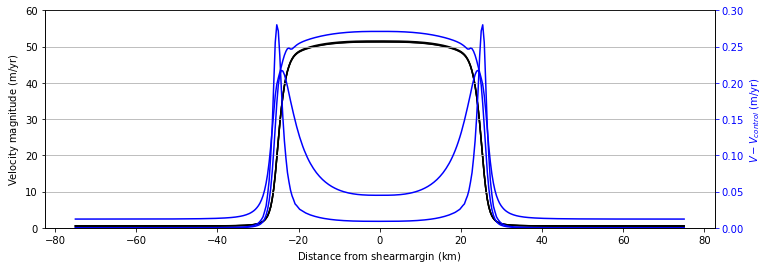

In [151]:
#    ax['A'].plot(x,v*yr2sec,label=experiment['name'])
#    ax['B'].plot(x,(v-v0)*yr2sec,label=experiment['name'])

fig,ax=plt.subplots()
ax2= ax.twinx()
ax.plot(x/1000,v*yr2sec,color='k')

for experiment in experiments:
    #if experiment["shearmargin_enhancement"]!=ref_experiment["shearmargin_enhancement"]:
    #    continue
    if experiment["name"]==ref_experiment["name"]:
        continue
    v = loadex(experiment)

    plt.grid()
    ax2.plot(x/1000,(v-v0)*yr2sec,label='a',color='b')
ax.set_ylim(0,60)
ax.set_ylabel('Velocity magnitude ($\mathrm{m/yr}$)', color='k')
ax2.set_ylim(0,0.3)
ax2.tick_params(axis='y', colors='b')
ax2.set_ylabel('$V-V_{control}$ ($\mathrm{m/yr}$)', color='b')
ax.set_xlabel('Distance from shearmargin ($\mathrm{km}$)')
